In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.linalg import eig

In [7]:
#take few datapoint
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [9]:
df=pd.DataFrame(data,columns=['col1','col2'])

In [10]:
df

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


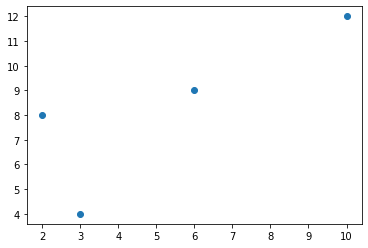

In [13]:
plt.scatter(df["col1"],df["col2"])

In [14]:
#4 steps:
#1. standarization of data
#2. cov matrix
#3. eig value and eig vector
#4. find principle component

In [15]:
df

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


In [16]:
#standarization by standard scala

In [22]:
meanbycol=np.mean(df,axis=0)

In [21]:
stdbycol=np.std(df,axis=0)

In [23]:
meanbycol

col1    5.25
col2    8.25
dtype: float64

In [24]:
stdbycol

col1    3.112475
col2    2.861381
dtype: float64

In [25]:
df-meanbycol

,col1,col2
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [26]:
scaled_by_mean=df-meanbycol

In [27]:
scaled_by_mean/stdbycol

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [28]:
scaled_data=scaled_by_mean/stdbycol

In [29]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [30]:
#SND by sklearn 

In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [32]:
scaler.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [33]:
#2. covariance
np.cov(scaled_data.T)

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [34]:
cov_mat=np.cov(scaled_data.T)

In [36]:
#3. eig value n eig vector
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [37]:
eig_val

array([2.40938985, 0.25727682])

In [38]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [39]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [40]:
eig_vec[0]

array([ 0.70710678, -0.70710678])

In [43]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [44]:
#same we can do with sklearn
from  sklearn.decomposition import PCA
pca=PCA()

In [45]:
pca.fit_transform(scaled_data) #first col is pc1 n second col is pc2

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [46]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [48]:
pca.explained_variance_ratio_  #first one is PC1 and second one is PC2 , combine both and it qill give 100percent data.

array([0.90352119, 0.09647881])

In [49]:
0.90352119+ 0.09647881

1.0

In [ ]:
##in machine learning, we take PC1 coomponet as it is giving max. variance or covering more data